# First ML Pipeline with AutoML

<!--<badge>--><a href="https://colab.research.google.com/github/kuennethgroup/ml_in_ms_st25/blob/main/02_ex/first_ml_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->

In this tutorial, we'll use the `pandas` Python library to import a polymer dataset containing information on the tendency to crystallize for 432 polymers. After plotting a histogram of the dataset, we'll use automated machine learning (FLAML and AutoGluon) libraries to train ML models. Finally, we'll analyze model performance using parity plots, plotted with matplotlib.

## Overview

We'll explore two popular AutoML frameworks:

#### FLAML (A Fast Library for Automated Machine Learning & Tuning)

FLAML automates the training of machine learning models by automatically searching for high-quality models. It iterates through various machine learning algorithms and hyperparameters to find the best performing model for your dataset.

#### AutoGluon

AutoGluon is another powerful AutoML framework that automatically trains and tunes multiple models, creating ensembles to achieve state-of-the-art performance with minimal configuration.

In [1]:
# on Colab
# !pip install flaml[automl]

## Step 1: Load and Explore Data

**Tasks:**

1. Use `pandas` to read the polymer dataset from the URL into a DataFrame named `df`.
2. Plot a histogram showing the distribution of property values using 40 bins.

This will help us understand the distribution and range of the target variable we're trying to predict.

,smiles,property,value,fingerprint
0,[*]C[*],Xc,47.80,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,[*]CC([*])C,Xc,44.47,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,[*]CC([*])CC,Xc,34.04,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,[*]CC([*])CCC,Xc,20.01,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,[*]CC([*])CC(C)C,Xc,21.64,"[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
427,[*]C([*])(F)F,Xc,31.84,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
428,[*]C/C=C\C[*],Xc,25.58,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
429,[*]O[Si](C)(C)CCCC(=O)Oc1ccc(C=Nc2ccc(N=Cc3ccc...,Xc,29.05,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
430,[*]O[Si](C)(C)CCCC(=O)Oc1ccc(C=Nc2ccc(Cc3ccc(N...,Xc,21.74,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."


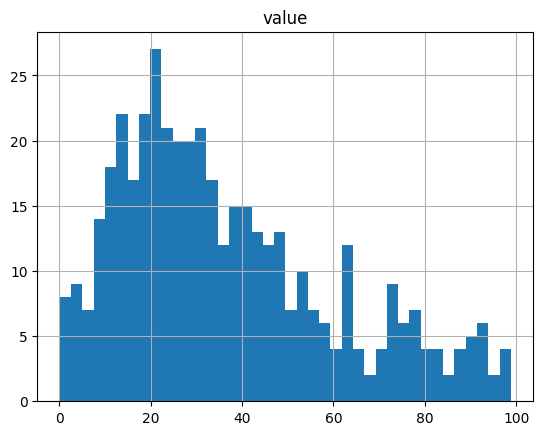

In [2]:
import pandas as pd
import numpy as np

df = pd.read_json(
    "https://raw.githubusercontent.com/kuennethgroup/materials_datasets/refs/heads/main/polymer_tendency_to_crystalize/polymers_tend_to_crystalize.json"
)
df.hist("value", bins=40)
display(df)

Fingerprint: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

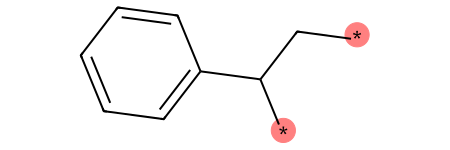

In [5]:
from psmiles import PolymerSmiles as PS

row_number = 10

print(f"Fingerprint: {df.iloc[row_number].fingerprint}")
print(f"Tendency to crystallize: {df.iloc[row_number].value}")
PS(df.iloc[row_number].smiles)

## Split the dataset in 20 / 80 %

In [3]:
from sklearn.model_selection import train_test_split


X_all = pd.DataFrame(np.vstack(df["fingerprint"]))
y_all = df["value"].apply(float)
all_data = pd.concat([X_all, y_all], axis=1)

train_data, test_data = train_test_split(all_data, test_size=0.2, random_state=42)
train_data

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,value
132,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,57.620000
231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,28.370000
31,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21.610000
84,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,79.990000
296,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.370000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29.770000
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21.110000
270,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.900000
348,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,12.490000


## Step 2: Train Model with FLAML

Now we'll train a regression model using FLAML's AutoML capabilities. FLAML will automatically test different algorithms and hyperparameters to find the best performing model.

**Evaluation Metric:**

We'll use Mean Squared Error (MSE) to evaluate model performance:

$$\text{Mean Squared Error (MSE)} = \frac{1}{n} \sum_{i=1}^n (Y_i - \hat{Y}_i)^2$$

where:
- $Y_i$ = true value
- $\hat{Y}_i$ = predicted value  
- $n$ = number of samples

Lower MSE values indicate better model performance.

In [4]:
# In case flaml is not installed execute
# !pip install -U "flaml[automl]"

from flaml import AutoML

automl = AutoML()


automl_settings = {
    "task": "regression",  # Classification (i.e., yes,no,maybe, etc.) is also possible
    "starting_points": "data",  # Some preselection helper of FLAML
    "metric": "mse",  # Goal is minimize the error (loss function). Measure with mean squared error (MSE).
    "time_budget": 60,
    "max_iter": 100,
}


automl.fit(
    train_data.drop("value", axis=1).values,
    train_data["value"].values,
    **automl_settings,
)

KeyboardInterrupt: 

In [ ]:
# Lower is better
automl.best_loss_per_estimator

{'extra_tree': 108.15741019279693,
 'lgbm': 263.9805682105229,
 'rf': 142.3542339779104,
 'xgboost': 321.1292976833637,
 'xgb_limitdepth': inf,
 'sgd': 224.1637817854768,
 'catboost': inf}

## Step 3: Train Model with AutoGluon

Next, we'll train a model using AutoGluon's AutoML capabilities. AutoGluon automatically builds and ensembles multiple models to achieve robust predictions.

AutoGluon will output a leaderboard showing the performance of different models and their ensembles.

In [ ]:
from autogluon.tabular import TabularPredictor


predictor = TabularPredictor(label="value").fit(
    train_data, time_limit=200, presets="medium_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20251021_174851"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.8
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #167-Ubuntu SMP Wed Sep 17 21:35:53 UTC 2025
CPU Count:          192
Memory Avail:       747.02 GB / 1007.45 GB (74.1%)
Disk Space Avail:   1791.33 GB / 7096.34 GB (25.2%)
Presets specified: ['medium_quality']
Using hyperparameters preset: hyperparameters='default'
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.8
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #167-Ubuntu SMP Wed Sep 17 21:35:53 UTC 2025
CPU Count:          192
Memory Avail:       747.02 GB / 1007.45 GB (74.1%)
Disk Space Avail:   1791.33 GB / 7096.34 GB (25.2%)
Presets specified: ['medium_quality']
Using hyperparameters p

In [ ]:
predictor.evaluate(test_data)

{'root_mean_squared_error': np.float64(-18.064171364822744),
 'mean_squared_error': -326.314287097682,
 'mean_absolute_error': -13.87238082861373,
 'r2': 0.46430661285659025,
 'pearsonr': 0.6918494502659108,
 'median_absolute_error': -10.009426803588868}

In [ ]:
predictor.leaderboard(test_data)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-18.064171,-17.704593,root_mean_squared_error,0.144224,0.132944,36.257195,0.002011,0.000249,0.007662,2,True,10
1,NeuralNetTorch,-18.331331,-17.900770,root_mean_squared_error,0.108705,0.107933,27.311976,0.108705,0.107933,27.311976,1,True,8
2,RandomForestMSE,-18.654515,-19.766317,root_mean_squared_error,0.063294,0.062224,0.602958,0.063294,0.062224,0.602958,1,True,3
3,ExtraTreesMSE,-18.695730,-19.708392,root_mean_squared_error,0.073780,0.065779,1.027974,0.073780,0.065779,1.027974,1,True,5
4,NeuralNetFastAI,-19.429417,-19.378453,root_mean_squared_error,0.027335,0.007123,1.418045,0.027335,0.007123,1.418045,1,True,6
5,XGBoost,-19.531355,-20.054248,root_mean_squared_error,0.043369,0.025355,0.836180,0.043369,0.025355,0.836180,1,True,7
6,LightGBMXT,-19.648474,-18.684754,root_mean_squared_error,0.006174,0.017639,7.519511,0.006174,0.017639,7.519511,1,True,1
7,CatBoost,-19.662561,-19.415103,root_mean_squared_error,0.027940,0.034797,5.020140,0.027940,0.034797,5.020140,1,True,4
8,LightGBM,-20.550314,-19.513685,root_mean_squared_error,0.007978,0.003847,1.834408,0.007978,0.003847,1.834408,1,True,2
9,LightGBMLarge,-20.942873,-20.376421,root_mean_squared_error,0.005646,0.010178,3.936044,0.005646,0.010178,3.936044,1,True,9


## Step 4: Analyze Predictions

Now we'll visualize model performance using **parity plots** (also called predicted vs. actual plots). In a parity plot:
- Each point represents a sample from the test set
- The x-axis shows predicted values
- The y-axis shows true values
- Points close to the 45° diagonal line indicate accurate predictions
- The dashed line represents perfect predictions

We'll create side-by-side parity plots to compare FLAML and AutoGluon performance.

Text(0.1, 0.8, 'AutoGluon - MSE 326.31')

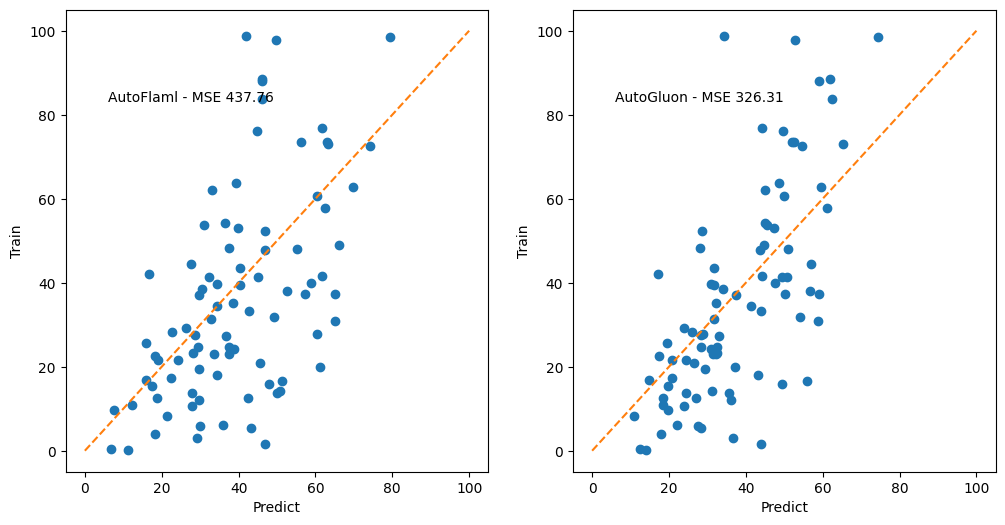

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


# AutoFlaml
y_pred = automl.predict(test_data.drop("value", axis=1).values)

ax1.plot(y_pred, test_data["value"], "o")
ax1.plot([0, 100], [0, 100], "--")
ax1.set_ylabel("Train")
ax1.set_xlabel("Predict")


mse_autoFlaml = mean_squared_error(
    test_data["value"].values,
    y_pred,
)

ax1.text(0.1, 0.8, f"AutoFlaml - MSE {mse_autoFlaml:.2f}", transform=ax1.transAxes)


# AutoGluon

y_pred = predictor.predict(test_data.drop("value", axis=1))
ax2.plot(y_pred, test_data["value"], "o")
ax2.plot([0, 100], [0, 100], "--")
ax2.set_ylabel("Train")
ax2.set_xlabel("Predict")


mse_autoGluon = mean_squared_error(
    test_data["value"].values,
    y_pred,
)

ax2.text(
    0.1,
    0.8,
    f"AutoGluon - MSE {mse_autoGluon:.2f}",
    transform=ax2.transAxes,
)

## Further Exploration

Expand your skills and deepen understanding with these tasks:

1. **Compare Performance**: Analyze the MSE values and parity plots. Which AutoML framework performs better on this dataset?

2. **Time Budget Experiments**: Modify the `time_budget` and `time_limit` parameter in FLAML and AutoGl]uon (try 30, 120, 300 seconds) and compare how training time affects model performance.

3. **Iteration Limits**: Experiment with different `max_iter` values in FLAML to see how the number of model trials impacts results.

4. **Presets**: Experiment with different `presets` values in AutoGluon to see how the number of model trials impacts results.

These experiments will help you understand the trade-offs between computational cost and model quality in AutoML.